# Аналитика в Яндекс.Афише

У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:

лог сервера с данными о посещениях сайта Яндекс.Афиши,

выгрузка всех заказов за этот период,

статистика рекламных расходов.

Необходимо изучить:

как люди пользуются продуктом,

когда они начинают покупать,

сколько денег приносит каждый клиент,

когда клиент окупается.

# Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Загрузили библиотеки, теперь прочитаем данные и сохраним

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
def read_all_info(df):
    print(df.info())
    print(df.describe())
    print(df.head(10))

In [4]:
read_all_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:

Пропусков нет, названия столбцов на мой взгляд некорректные (заглавные буквы, пробелы), ошибка в типе данных в датах

In [5]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [6]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Готово. Даты теперь как даты, заголовки корректные. Переходим ко второму датафрейму

In [8]:
read_all_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  1246462

Похожая ситуация. Заголовки переименовать необходимо, типы данных изменить

In [9]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [10]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


переходим далее к costs

In [12]:
read_all_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24


Пропусков нет, заголовки корректные, тип данных у даты не верный

In [13]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Прочитали данные, исправили ошибки. visits - датафрейм с посещением нашего сайта, где есть информация об устройстве с которого было произведено посещение, время начала сессии, время его окончания, уникальный идентификационный номер, источник трафика. orders - заказы, информация о дате заказа, сумме, номер уникального идентификатора. costs - информация о расходах на маркетинг, здесь информации об идентификаторе источника рекламы, дате, суммы расхода. Можно переходить к следующему шагу.

# Шаг 2. Построим отчёты и посчитаем метрики

Для начала начнем работу с visits. Узнаем:

Сколько людей пользуются в день, неделю, месяц?

Сколько сессий в день?

Сколько длится одна сессия?

Как часто люди возвращаются?

Создадим продолжительность сессий в секундах и сохраним в новом столбце, также  выделим год, месяц, неделю,  день сессии

In [15]:
visits['durations'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['year']  = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week']  = visits['start_ts'].dt.week
visits['date'] = visits['start_ts'].dt.date

Уберем сессии продолжительностью 0 секунд, перезапишем таблицу

In [16]:
visits = visits[visits['durations'] != 0]

In [17]:
dau_total = visits.groupby('date').agg({'uid': 'nunique'}).mean()
ses_cnt = visits.groupby('date').agg({'uid': 'count'}).mean()
ses_time = visits.groupby('date').agg({'durations': 'mean'}).mean()
wau_total = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
sticky_mau = (dau_total / mau_total * 100)
sticky_wau = (dau_total / wau_total *100)
dau_total['uid']
visits_inf = {'DAU(Кол-во уникальных пользователей в день)':dau_total['uid'],'Кол-во сессий в день':ses_cnt['uid'],'Среднее время сессии':ses_time['durations'], "WAU(Кол-во уникальных пользователей в неделю)":wau_total['uid'], 'MAU(Кол-во уникальных пользователей в месяц)':mau_total['uid'], "STICKY_MAU":sticky_mau['uid'], "STICKY_WAU":sticky_wau['uid']}
visits_inf = pd.Series(visits_inf)
visits_inf

DAU(Кол-во уникальных пользователей в день)        817.585165
Кол-во сессий в день                               889.027473
Среднее время сессии                               691.705410
WAU(Кол-во уникальных пользователей в неделю)     5148.301887
MAU(Кол-во уникальных пользователей в месяц)     20955.750000
STICKY_MAU                                           3.901484
STICKY_WAU                                          15.880676
dtype: float64

In [18]:
pd.pivot_table(visits, index = ['year','month'], columns = 'device', values = 'uid', aggfunc = 'nunique').mean()

device
desktop    15239.916667
touch       5999.166667
dtype: float64

Посмотрим графики посещаемости в разрезе устройств

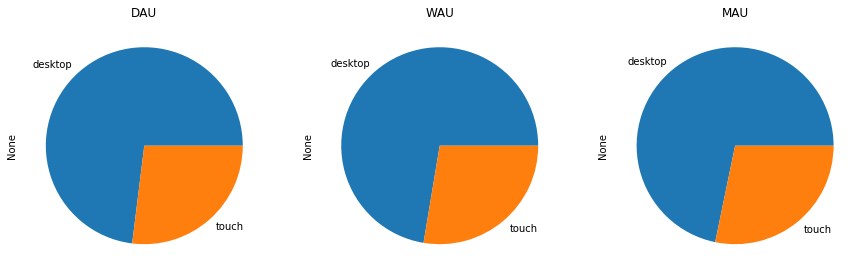

In [19]:
plt.subplots(figsize = (15,5))
(visits.pivot_table(index = 'date', columns = 'device', values = 'uid', aggfunc = 'nunique')).mean().plot(title = 'DAU' ,kind = 'pie', ax = plt.subplot(1,3,1))
plt.show
(pd.pivot_table(visits, index = ['year','week'], columns = 'device', values = 'uid', aggfunc = 'nunique')).mean().plot(title = 'WAU', kind = 'pie', ax = plt.subplot(1,3,2))
plt.show
(pd.pivot_table(visits, index = ['year','month'], columns = 'device', values = 'uid', aggfunc = 'nunique')).mean().plot(title = 'MAU', kind = 'pie', ax = plt.subplot(1,3,3))

Количество пользователей с мобильных устройств значительно меньше количества пользователей с ПК. Посмотрим среднее время сессий в разрезе устройства

In [20]:
pd.pivot_table(visits, index = 'date', columns = 'device', values = {'durations':'mean'}).mean()

           device 
durations  desktop    750.306591
           touch      530.678326
dtype: float64

Продолжительность посещения сайта с мобильных устройств меньше чем со стационарных. 

Чтобы ответить на вопрос как часто пользователи возвращаются проведем расчет retention rate. Поделим на когорты пользователей по месяцам. Найдем дату первой покупки для каждого пользователя, добавим ее в visits, в отдельный столбец запишем первый месяц активности. Посчитаем lifetime в отдельный столбик.

In [21]:
first_visits = visits.groupby(['uid'])['start_ts'].min()
first_visits.name = 'first_visits_date'
visits = visits.join(first_visits, on = 'uid')
visits['first_visits_month'] = visits['first_visits_date'].astype('datetime64[M]')
visits['activity_month'] = visits['date'].astype('datetime64[M]')
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_visits_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

Далее сгруппируем данные по месяцу визита (когорте) и lifetime, посчитав кол-во уникальных пользователей, далее найдем численность каждой когорты, добавим численность каждой когорты к ранее сгруппированным данным, получим таблицу с кол-вом уникальных пользователей когорты, количеством уникальных пользователей на определенном месяце активности и сможем посчитать % возврата за каждый временной промежуток, для оформления снова сделаем сводную таблицу и посмотрим на нее. Для наглядности исключим 0 месяц

In [22]:
cohorts = visits.groupby(['first_visits_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts_quantity = cohorts[cohorts['cohort_lifetime'] == 0][['first_visits_month','uid']]
cohorts_quantity.columns = ['first_visits_month', 'cohorts_counts']
cohorts = cohorts.merge(cohorts_quantity,on='first_visits_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohorts_counts']
cohorts_cut = cohorts[cohorts['cohort_lifetime'] != 0]
retention_rate_cohorts = cohorts_cut.pivot_table(index = 'first_visits_month', columns = 'cohort_lifetime', values = 'retention')
retention_rate_cohorts = retention_rate_cohorts
retention_rate_cohorts

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_visits_month,,,,,,,,,,,
2017-06-01,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07-01,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08-01,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09-01,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10-01,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN
2017-11-01,0.078183,0.042733,0.037824,0.032633,0.021729,0.020602,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.054668,0.036518,0.030178,0.019453,0.017716,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.057794,0.037817,0.024352,0.019249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.056561,0.024290,0.019184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Взглянем на кол-во пользователей в когортах и на повторные заходы по месяцам

In [23]:
cohorts.pivot_table(index = 'first_visits_month', columns = 'cohort_lifetime', values = 'uid').fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visits_month,,,,,,,,,,,,
2017-06-01,11885.0,900,606,710,777,802,686,667,606,591,453,522
2017-07-01,11825.0,645,596,658,670,550,521,521,448,323,320,
2017-08-01,9214.0,686,557,557,442,382,334,347,250,228,,
2017-09-01,15125.0,1264,1025,746,576,559,535,346,344,,,
2017-10-01,23538.0,1839,1196,890,792,734,489,466,,,,
2017-11-01,24852.0,1943,1062,940,811,540,512,,,,,
2017-12-01,23030.0,1259,841,695,448,408,,,,,,
2018-01-01,20573.0,1189,778,501,396,,,,,,,
2018-02-01,20173.0,1141,490,387,,,,,,,,


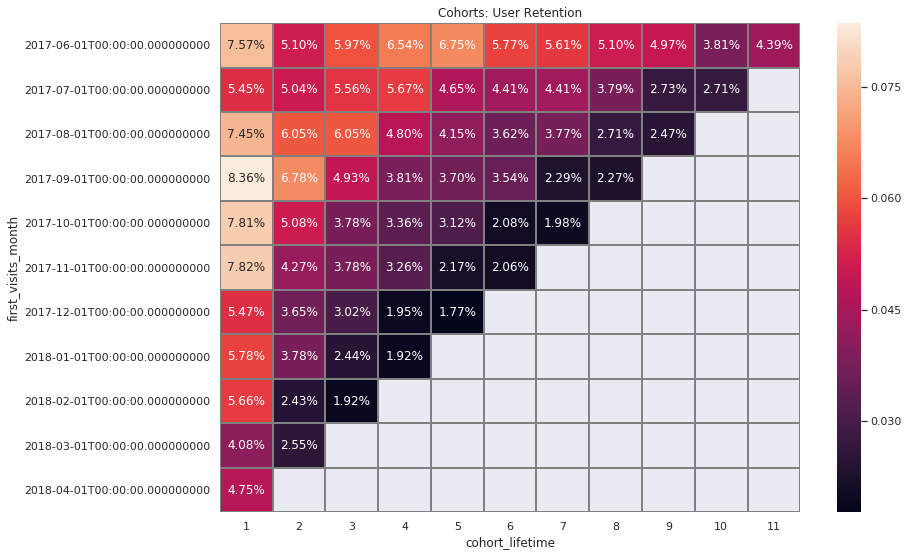

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_rate_cohorts, annot=True, fmt='.2%', linewidths=1, linecolor='gray');

В целом процент не очень большой, быть может характеризуется спецификой отрасли? Любимая группа приезжает в твой родной город не каждый месяц. На 1 месяц lifetime падение до 5-8%, далее достаточно стабильно до 2-3% плавно. Чем старше когорта, тем лучше у нее retention rate. Если осенне-зимние когорты еще можно оправдать тем что там количество когорты изначально выше, то весенние когорты 2018 все равно не догоняют летние по % retention. Что-то пошло не так =)

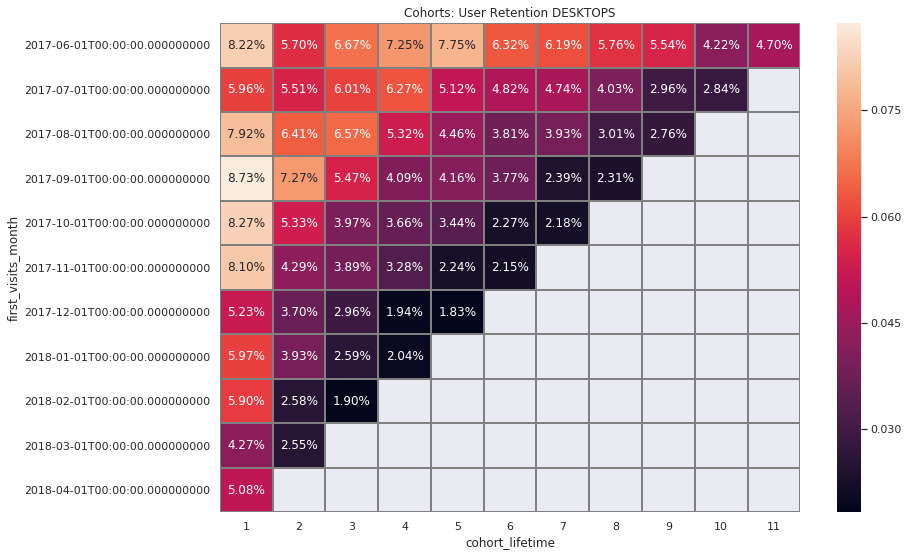

In [25]:
visits_d = visits[visits['device'] == 'desktop']
cohorts_d = visits_d.groupby(['first_visits_month','cohort_lifetime','device']).agg({'uid':'nunique'}).reset_index()
cohorts_quantity_d = cohorts_d[cohorts_d['cohort_lifetime'] == 0][['first_visits_month','uid']]
cohorts_quantity_d.columns = ['first_visits_month', 'cohorts_counts']
cohorts_d = cohorts_d.merge(cohorts_quantity_d,on='first_visits_month')
cohorts_d['retention'] = cohorts_d['uid']/cohorts_d['cohorts_counts']
cohorts_cut_d = cohorts_d[cohorts_d['cohort_lifetime'] != 0]
retention_rate_cohorts_d = cohorts_cut_d.pivot_table(index = 'first_visits_month', columns = 'cohort_lifetime', values = 'retention')
retention_rate_cohorts_d = retention_rate_cohorts_d

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention DESKTOPS')
sns.heatmap(retention_rate_cohorts_d, annot=True, fmt='.2%', linewidths=1, linecolor='gray');

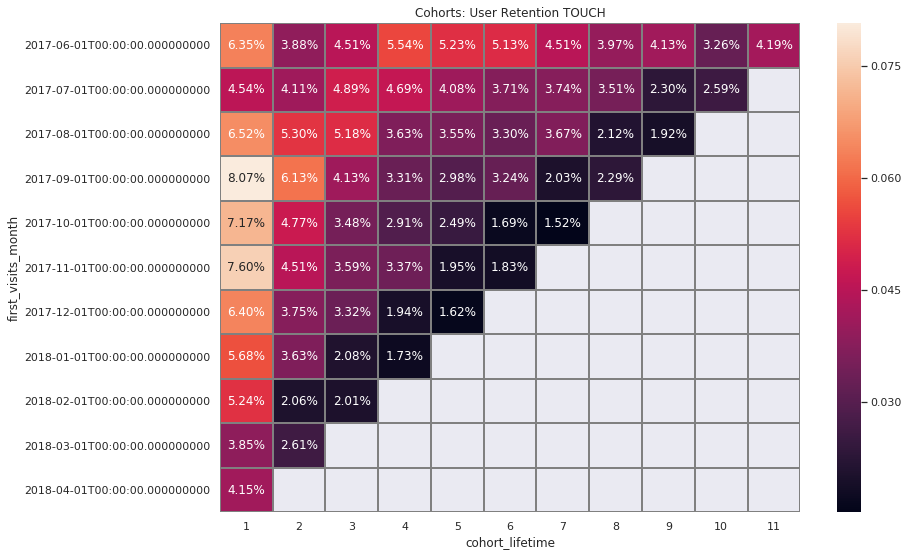

In [26]:
visits_m = visits[visits['device'] == 'touch']
cohorts_m = visits_m.groupby(['first_visits_month','cohort_lifetime','device']).agg({'uid':'nunique'}).reset_index()
cohorts_quantity_m = cohorts_m[cohorts_m['cohort_lifetime'] == 0][['first_visits_month','uid']]
cohorts_quantity_m.columns = ['first_visits_month', 'cohorts_counts']
cohorts_m = cohorts_m.merge(cohorts_quantity_m,on='first_visits_month')
cohorts_m['retention'] = cohorts_m['uid']/cohorts_m['cohorts_counts']
cohorts_cut_m = cohorts_m[cohorts_d['cohort_lifetime'] != 0]
retention_rate_cohorts_m = cohorts_cut_m.pivot_table(index = 'first_visits_month', columns = 'cohort_lifetime', values = 'retention')
retention_rate_cohorts_m = retention_rate_cohorts_m

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention TOUCH')
sns.heatmap(retention_rate_cohorts_m, annot=True, fmt='.2%', linewidths=1, linecolor='gray');

В целом различия heatmap между touch версией и mobile особо не вижу. Ведут себя похоже. Но есть незначительные различия в %.

### Продажи

Когда люди начинают покупать?

Сколько раз покупают за период?

Какой средний чек?

Сколько денег приносят? (LTV)


Добавим в таблицу orders информацию об устройствах

In [27]:
uid_device_info = visits.groupby(['uid', 'device']).agg({'year':'count'}).reset_index()
uid_device_info = uid_device_info[['uid', 'device']]
orders = orders.merge(uid_device_info, on = 'uid')

 Создадим базу с первыми покупками, соединим базу с первыми посещениям, проанализируем

In [28]:
first_orders = orders.groupby(['uid','device'])['buy_ts'].min().reset_index()
first_orders = first_orders.join(first_visits, on = 'uid')
first_orders

,uid,device,buy_ts,first_visits_date
0,313578113262317,desktop,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,touch,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,desktop,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,desktop,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,desktop,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...,...
38800,18445407535914413204,touch,2017-09-22 23:55:00,2017-09-22 23:48:00
38801,18445601152732270159,desktop,2018-03-26 22:54:00,2017-08-07 11:51:00
38802,18446156210226471712,desktop,2018-02-18 19:34:00,2017-11-07 10:01:00
38803,18446156210226471712,touch,2018-02-18 19:34:00,2017-11-07 10:01:00


Найдем разницу во времени в минутах между первой активностью и продажей (в минутах)

In [29]:
first_orders['time_to_sell'] = (first_orders['buy_ts'] - first_orders['first_visits_date']).dt.seconds/60

In [30]:
first_orders['time_to_sell'].describe()

count    38805.000000
mean       256.568509
std        433.284080
min          0.000000
25%          4.000000
50%         16.000000
75%        280.000000
max       1439.000000
Name: time_to_sell, dtype: float64

In [31]:
first_orders['time_to_sell'].median()

16.0

In [32]:
first_orders.groupby('device').agg({'time_to_sell':'median'})

,time_to_sell
device,
desktop,15.0
touch,32.0


In [33]:
first_orders.groupby('device').agg({'time_to_sell':'mean'})

,time_to_sell
device,
desktop,238.996192
touch,318.230885


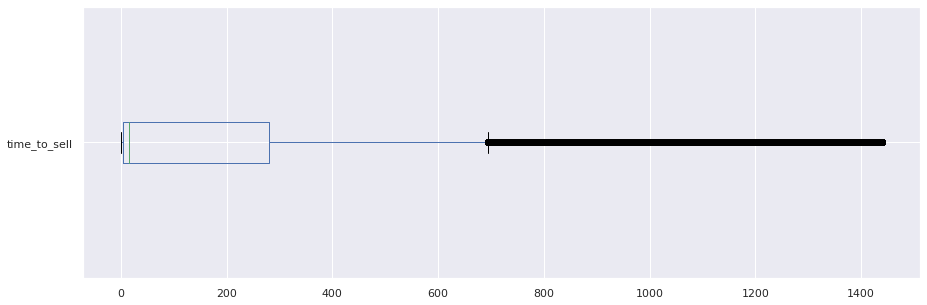

In [34]:
first_orders.boxplot(column= 'time_to_sell', vert=False, figsize = (15,5))

В среднем продажи происходят через 256 минут после первого посещения, но на графике и в описании видим, что существуют большие выбросы, посмотрим медиану - 16 минут. С мобильных устройств дольше происходит продажа (32) чем у десктопного устройства. Необходимо показать данную информацию разработчикам. Может быть формы покупки на сайте сложные? Мне кажется разрыв большой

Для продаж по периодам добавим колонки с Годом, Месяцем, неделей, днем

In [35]:
orders['year']  = orders['buy_ts'].dt.year
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
orders['week']  = orders['buy_ts'].dt.week
orders['date'] = orders['buy_ts'].dt.date

Так как период наших данных - 1 год разумно посмотреть продажи помесячно.

In [36]:
orders.groupby(['year','month']).agg({'uid':'count'}).reset_index()

,year,month,uid
0,2017,2017-06-01,2553
1,2017,2017-07-01,2576
2,2017,2017-08-01,1970
3,2017,2017-09-01,3675
4,2017,2017-10-01,6213
5,2017,2017-11-01,6324
6,2017,2017-12-01,6823
7,2018,2018-01-01,5077
8,2018,2018-02-01,5734
9,2018,2018-03-01,5776


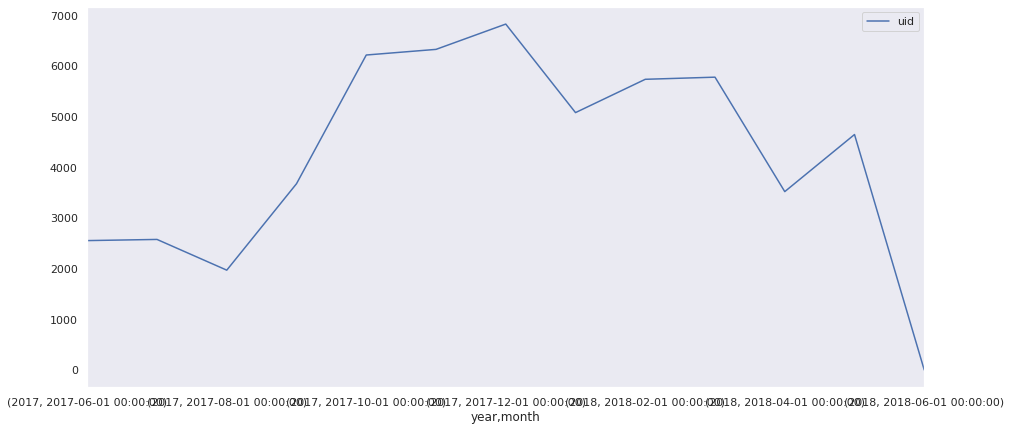

In [37]:
orders.groupby(['year','month']).agg({'uid':'count'}).plot(figsize = (15,7))

Можно заметить, как в Октябре 2017 произошел рост продаж, возможно это сезонный рост? мало информации для сравнения. Начинаются холодные месяца и клиенты выбирают проведение досуга не на открытом воздухе? Падение происходит также в апреле, но май снова показывает рост, но не до показателей зимы. Хорошо бы 2 года посмотреть, тогда бы мы разобрались с сезонным фактором

In [38]:
orders['revenue'].describe()

count    54886.000000
mean         5.110668
std         21.375158
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [39]:
orders.groupby(['year','month']).agg({'revenue':'mean'})

revenue
year month               
2017 2017-06-01  4.034375
     2017-07-01  5.482279
     2017-08-01  4.950924
     2017-09-01  5.688653
     2017-10-01  5.221458
     2017-11-01  4.937274
     2017-12-01  5.714480
2018 2018-01-01  4.231924
     2018-02-01  4.854058
     2018-03-01  5.588264
     2018-04-01  5.383524
     2018-05-01  4.784558
     2018-06-01  3.420000

Средняя выручка у нас 5. Количество продаж мы смотрели в разрезе месяца, интересно посмотреть как средний чек по месяцам. В целом средний чек колеблется, но не сильно, сильная просадка в Январе 2018, а в июне 2018 не показательно, в связи с тем что это не полный месяц

Приступим к расчету LTV. Найдем первый месяц покупок, запишем в отдельный ДФ, добавим этот месяц в начальный ДФ. Найдем lifetime, запишем в отдельный столбик

In [40]:
orders_first_month = orders.groupby(['uid']).agg({'buy_ts':'min'})
orders_first_month['buy_ts'] = orders_first_month['buy_ts'].astype('datetime64[M]')
orders_first_month = orders_first_month.rename(columns = {'buy_ts':'first_month_buy'})
orders = orders.join(orders_first_month, on = 'uid')
orders['lifetime'] = (orders['buy_ts'] - orders['first_month_buy'])
orders['lifetime'] = orders['lifetime']/np.timedelta64(1,'M')
orders['lifetime'] = orders['lifetime'].round().astype(int)

Найдем количество клиентов по каждой когорте, запишем в основной ДФ

In [41]:
cohort_orders_sizes = orders.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_orders_sizes.columns = ['first_month_buy', 'n_buyers']
orders = pd.merge(orders, cohort_orders_sizes, on = 'first_month_buy')

Найдем выручку по каждой когорте, добавим в новый ДФ всю информацию выручку, кол-во покупателей, месяц когорты, возраст группы и сможем получить LTV. Так как маржинальности у нас нет, считаем по выручке.

In [42]:
cohorts_orders = orders.groupby(['first_month_buy','month']).agg({'revenue': 'sum'}).reset_index()

In [43]:
full_cohorts = pd.merge(cohort_orders_sizes, cohorts_orders, on='first_month_buy')
full_cohorts['age'] = ((full_cohorts['month'] - full_cohorts['first_month_buy']) / np.timedelta64(1, 'M')).round().astype('int')
full_cohorts['ltv'] = full_cohorts['revenue'] / full_cohorts['n_buyers']

Посмотрим на LTV без накопления

In [44]:
report_ltv = full_cohorts.pivot_table(index = 'first_month_buy', columns = 'age', values = 'ltv', aggfunc = 'mean')

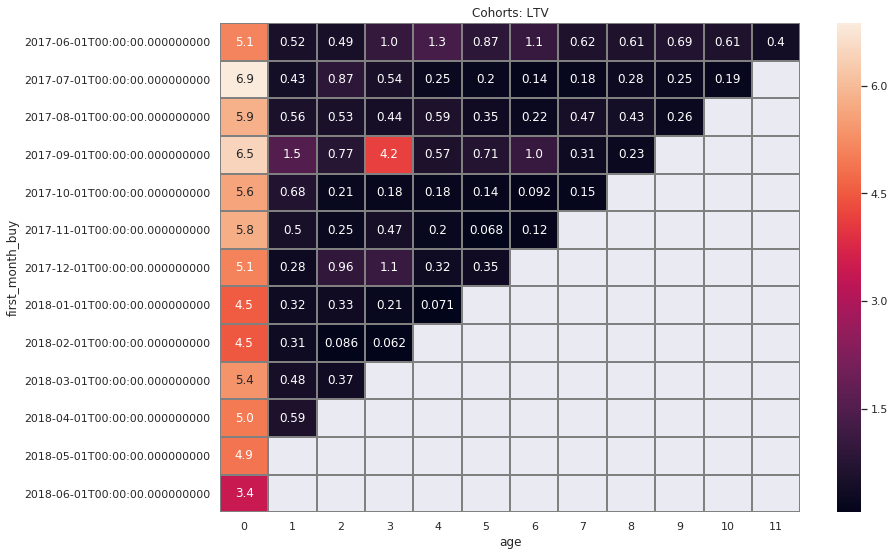

In [45]:
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(report_ltv, annot=True, fmt='.2', linewidths=1, linecolor='gray');

Теперь добавим накопление и заново посмотрим таблицу

In [46]:
report_ltv = report_ltv.cumsum(axis = 1)

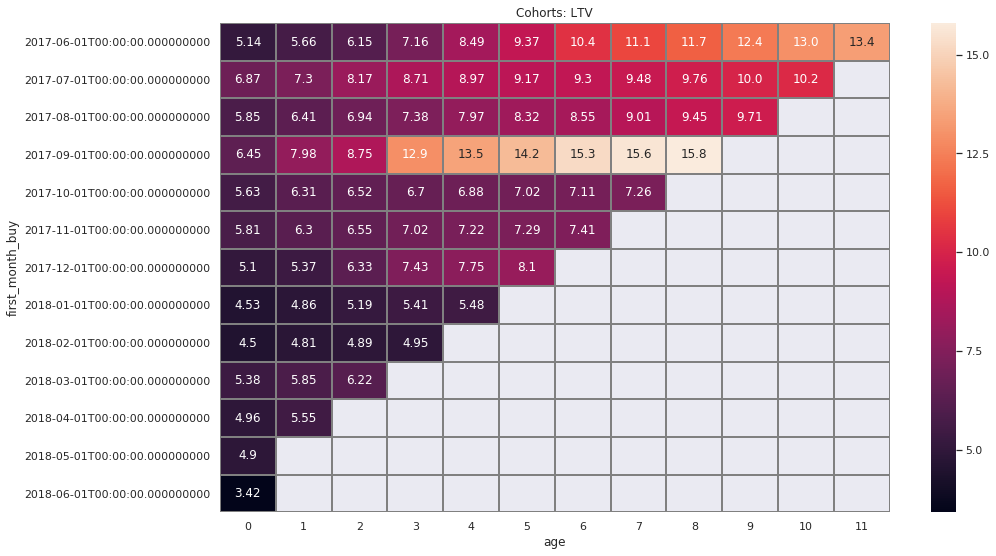

In [47]:
sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: LTV')
sns.heatmap(report_ltv, annot=True, fmt='.3', linewidths=1, linecolor='gray');

Теперь перейдем к выводам. Необходимо дать рекомендации маркетологам. Первое что хочется отметить что средний LTV первых месяцев 2017 года выше чем средний LTV 2018. Есть аномалия (какая-то особая маркетинговая акция по возврату старых клиентов??) у сентябрьской когорты в 3 месяце. И в целом данная когорта имеет неплохие показатели. По первой когорте можно сделать вывод что на 1 клиента мы не можем тратить более 11,9 условных единиц. Но данная когорта имеет более высокие показатели в сравнении с остальными. Я бы посмотрел по второй когорте и рекомендовал бы максимальную сумму расходов на 1 клиента в 8,5 условных единиц.

Теперь посмотрим на LTV выбирая только Desktop

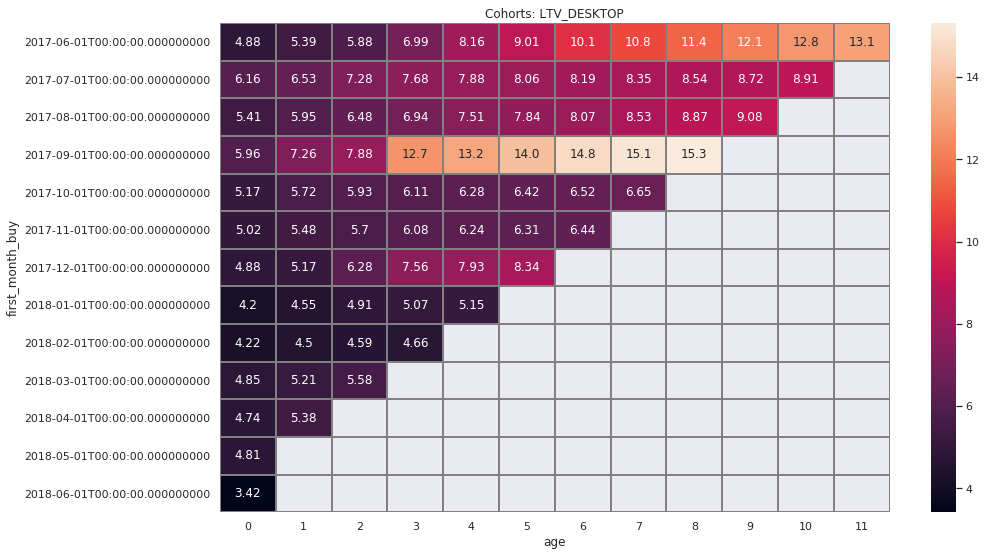

In [48]:
########################################################################################
orders_d = orders[orders['device'] == 'desktop']
orders_first_month_d = orders_d.groupby(['uid']).agg({'buy_ts':'min'}).reset_index()
orders_first_month_d['buy_ts'] = orders_first_month_d['buy_ts'].astype('datetime64[M]')
orders_first_month_d = orders_first_month_d.rename(columns = {'buy_ts':'first_month_buy'})
orders_d['lifetime'] = (orders_d['buy_ts'] - orders_d['first_month_buy'])
orders_d['lifetime'] = orders_d['lifetime']/np.timedelta64(1,'M')
orders_d['lifetime'] = orders_d['lifetime'].round().astype(int)
cohort_orders_sizes_d = orders_d.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_orders_sizes_d.columns = ['first_month_buy', 'n_buyers']
orders_d = pd.merge(orders_d, cohort_orders_sizes_d, on = 'first_month_buy')
cohorts_orders_d = orders_d.groupby(['first_month_buy','month']).agg({'revenue': 'sum'}).reset_index()
full_cohorts_d = pd.merge(cohort_orders_sizes_d, cohorts_orders_d, on='first_month_buy')
full_cohorts_d['age'] = ((full_cohorts_d['month'] - full_cohorts_d['first_month_buy']) / np.timedelta64(1, 'M')).round().astype('int')
full_cohorts_d['ltv'] = full_cohorts_d['revenue'] / full_cohorts_d['n_buyers']

report_ltv_d = full_cohorts_d.pivot_table(index = 'first_month_buy', columns = 'age', values = 'ltv', aggfunc = 'mean')
report_ltv_d = report_ltv_d.cumsum(axis = 1)

sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: LTV_DESKTOP')
sns.heatmap(report_ltv_d, annot=True, fmt='.3', linewidths=1, linecolor='gray');

Теперь посмотрим на LTV выбирая только Moblie

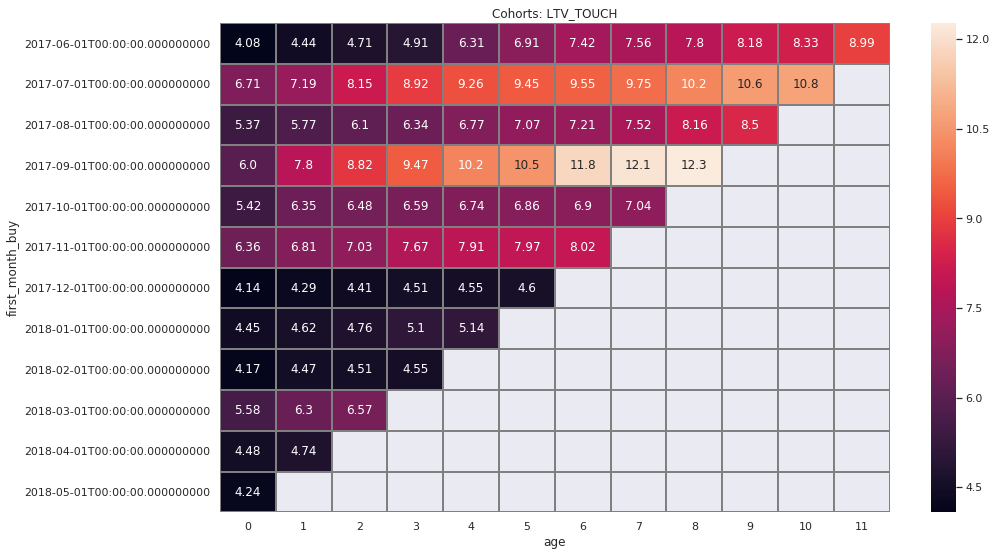

In [49]:
########################################################################################
orders_t = orders[orders['device'] == 'touch']
orders_first_month_t = orders_t.groupby(['uid']).agg({'buy_ts':'min'}).reset_index()
orders_first_month_t['buy_ts'] = orders_first_month_t['buy_ts'].astype('datetime64[M]')
orders_first_month_t = orders_first_month_t.rename(columns = {'buy_ts':'first_month_buy'})
orders_t['lifetime'] = (orders_t['buy_ts'] - orders_t['first_month_buy'])
orders_t['lifetime'] = orders_t['lifetime']/np.timedelta64(1,'M')
orders_t['lifetime'] = orders_t['lifetime'].round().astype(int)
cohort_orders_sizes_t = orders_t.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_orders_sizes_t.columns = ['first_month_buy', 'n_buyers']
orders_t = pd.merge(orders_t, cohort_orders_sizes_t, on = 'first_month_buy')
cohorts_orders_t = orders_t.groupby(['first_month_buy','month']).agg({'revenue': 'sum'}).reset_index()
full_cohorts_t = pd.merge(cohort_orders_sizes_t, cohorts_orders_t, on='first_month_buy')
full_cohorts_t['age'] = ((full_cohorts_t['month'] - full_cohorts_t['first_month_buy']) / np.timedelta64(1, 'M')).round().astype('int')
full_cohorts_t['ltv'] = full_cohorts_t['revenue'] / full_cohorts_t['n_buyers']

full_cohorts_t
report_ltv_t = full_cohorts_t.pivot_table(index = 'first_month_buy', columns = 'age', values = 'ltv', aggfunc = 'mean')
report_ltv_t = report_ltv_t.cumsum(axis = 1)
sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: LTV_TOUCH')
sns.heatmap(report_ltv_t, annot=True, fmt='.3', linewidths=1, linecolor='gray');

Если смотреть на LTV по когортам, по разным источникам, то видно что по разному ведут себя когорты. 1 когорта в дектопных версия сильно обгоняет 1 когорту в тач версиях, вторая же когорта ведет себя иначе, наоборот в мобильных версиях LTV выше чем в десктопных. Заглядывая вперед я посмотрел насколько отличались когортные траты на маркетинг в месяцах за июнь и за июль, и бюджеты там практически одинаковые, одинаковые также распределения бюджета по источникам рекламы. 

### Маркетинг

Сколько денег потратили? Всего / на каждый источник / по времени

Сколько стоило привлечение одного покупателя из каждого источника?

На сколько окупились расходы? (ROI)

In [50]:
print('Всего потрачено на маркетинг за весь период:', costs['costs'].sum())

Всего потрачено на маркетинг за весь период: 329131.62


In [51]:
source_id_grouped = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
source_id_grouped['%']= source_id_grouped['costs'] / source_id_grouped['costs'].sum()*100
print('Всего потрачено на маркетинг с разделением по источникам, с процентами от общей суммы')
source_id_grouped

Всего потрачено на маркетинг с разделением по источникам, с процентами от общей суммы


,source_id,costs,%
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


In [52]:
costs['month'] = costs['dt'].astype('datetime64[M]')
month_grouped = costs.groupby('month').agg({'costs':'sum'}).reset_index()
month_grouped['%']= month_grouped['costs'] / month_grouped['costs'].sum()*100
print('Всего потрачено на маркетинг с разделением по месяца, с процентами от общей суммы')
month_grouped

Всего потрачено на маркетинг с разделением по месяца, с процентами от общей суммы


,month,costs,%
0,2017-06-01,18015.00,5.473494
1,2017-07-01,18240.59,5.542035
2,2017-08-01,14790.54,4.493807
3,2017-09-01,24368.91,7.404001
4,2017-10-01,36322.88,11.035974
5,2017-11-01,37907.88,11.517544
6,2017-12-01,38315.35,11.641346
7,2018-01-01,33518.52,10.183926
8,2018-02-01,32723.03,9.942232
9,2018-03-01,30415.27,9.241066


Чтобы узнать, сколько стоило привлечение одного покупателя из каждого источника нам необходима информация о том, через какой именно источник пришел клиент. Информация о источнике посещения и id клиента есть в таблице visits. Информация о продажах по id есть в orders. Сначала source_id передадим в orders, затем сгруппируем продажи и соединим все в итоговом датафрейме.

In [53]:
visits_source_uid = visits.groupby(['uid', 'source_id']).agg({'week':'count'}).reset_index()
visits_source_uid =  visits_source_uid[['uid', 'source_id']] 
orders = pd.merge(orders, visits_source_uid, on = 'uid')
costs_grouped_source_month = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
orders_grouped_source_month = orders.groupby(['month', 'source_id']).agg({'uid':'count', 'revenue':'sum'}).reset_index()

In [54]:
report_orders_costs = pd.merge(orders_grouped_source_month, costs_grouped_source_month, how ='outer', on = ['month','source_id'])

Теперь можно вывести результат

In [55]:
report_cac = report_orders_costs.groupby('source_id').agg({'costs':'sum', 'uid':'sum'}).reset_index()
report_cac['cac'] = report_cac['costs'] / report_cac['uid']
report_cac.columns = ['source_id', 'costs', 'quantity', 'cac']
report_cac[report_cac['source_id'] != 7]

,source_id,costs,quantity,cac
0,1,20833.27,17313,1.203331
1,2,42806.04,17951,2.384605
2,3,141321.63,24229,5.832747
3,4,61073.60,24885,2.454233
4,5,51757.10,19372,2.671748
6,9,5517.49,5522,0.999183
7,10,5822.49,2711,2.147728


Теперь у нас есть информация по стоимости привлечения из разных источников. В источнике трафика судя по всему была ошибка с ресурсом под номером 7, из финальной таблицы исключаем его. Переходим к ROI. В текущей ситуации, когда есть несколько источников трафика есть смысл посчитать ROMI по этим самым источникам, а затем по когортам. У нас есть уже заготовка для этого. Объединенная таблица продаж с расходами report_orders_costs. Рассчитаем и добавим в нее LTV, CAC, ROI (ROMI).

In [56]:
report_romi = report_orders_costs.groupby('source_id').agg({'uid':'sum','revenue':'sum', 'costs':'sum'}).reset_index()
report_romi['ltv'] = report_romi['revenue'] / report_romi['uid']
report_romi['cac'] = report_romi['costs'] / report_romi['uid']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
final_report_romi = report_romi[['source_id', 'ltv', 'cac', 'romi']]
final_report_romi[final_report_romi['source_id'] != 7]

,source_id,ltv,cac,romi
0,1,6.940911,1.203331,5.768082
1,2,7.390668,2.384605,3.099326
2,3,5.665644,5.832747,0.971351
3,4,5.454412,2.454233,2.222450
4,5,6.490089,2.671748,2.429155
6,9,4.124721,0.999183,4.128093
7,10,3.419059,2.147728,1.591943


Добавим LTV отдельно по продажам с утройств Дектопа и отдельно с продаж с Тачей

In [57]:
orders_t = orders[orders['device'] == 'touch']
orders_t_sid = orders_t.groupby('source_id').agg({'revenue':'sum', 'uid':'count'}).reset_index()
orders_t_sid['ltv'] = orders_t_sid['revenue'] / orders_t_sid['uid']
orders_t_sid = orders_t_sid[['source_id', 'ltv']]
orders_t_sid.columns = ['source_id', 'ltv_t']
orders_t_sid

,source_id,ltv_t
0,1,6.774523
1,2,6.591513
2,3,5.496071
3,4,5.058092
4,5,5.599688
5,9,4.218795
6,10,3.417405


In [58]:
orders_d = orders[orders['device'] == 'desktop']
orders_d_sid = orders_d.groupby('source_id').agg({'revenue':'sum', 'uid':'count'}).reset_index()
orders_d_sid['ltv'] = orders_d_sid['revenue'] / orders_d_sid['uid']
orders_d_sid = orders_d_sid[['source_id', 'ltv']]
orders_d_sid.columns = ['source_id', 'ltv_d']
orders_d_sid

,source_id,ltv_d
0,1,6.993071
1,2,7.645254
2,3,5.712040
3,4,5.585805
4,5,6.720179
5,7,1.220000
6,9,4.090371
7,10,3.419650


Добавим LTV по обоим группам в отдельные столбцы

In [59]:
final_report_romi = final_report_romi.merge(orders_d_sid, on = 'source_id')
final_report_romi = final_report_romi.merge(orders_t_sid, on = 'source_id')
final_report_romi

,source_id,ltv,cac,romi,ltv_d,ltv_t
0,1,6.940911,1.203331,5.768082,6.993071,6.774523
1,2,7.390668,2.384605,3.099326,7.645254,6.591513
2,3,5.665644,5.832747,0.971351,5.712040,5.496071
3,4,5.454412,2.454233,2.222450,5.585805,5.058092
4,5,6.490089,2.671748,2.429155,6.720179,5.599688
5,9,4.124721,0.999183,4.128093,4.090371,4.218795
6,10,3.419059,2.147728,1.591943,3.419650,3.417405


Посчитаем ROMI для отдельных видов устройств.

In [60]:
final_report_romi['romi_d'] = final_report_romi['ltv_d'] / final_report_romi['cac']
final_report_romi['romi_t'] = final_report_romi['ltv_t'] / final_report_romi['cac']
final_report_romi

,source_id,ltv,cac,romi,ltv_d,ltv_t,romi_d,romi_t
0,1,6.940911,1.203331,5.768082,6.993071,6.774523,5.811428,5.629809
1,2,7.390668,2.384605,3.099326,7.645254,6.591513,3.206089,2.764195
2,3,5.665644,5.832747,0.971351,5.712040,5.496071,0.979305,0.942278
3,4,5.454412,2.454233,2.222450,5.585805,5.058092,2.275988,2.060966
4,5,6.490089,2.671748,2.429155,6.720179,5.599688,2.515274,2.095889
5,9,4.124721,0.999183,4.128093,4.090371,4.218795,4.093714,4.222243
6,10,3.419059,2.147728,1.591943,3.419650,3.417405,1.592217,1.591172


Из данного отчета можно посмотреть какие источники окупились, а какие нет. Немного вызывает тревогу источник номер 3, который пока что не окупился. В целом показатели ROMI больше единицы, что говорит о том, что они окупились, но не будем забыть что у нас нет margin rate и вместо LTV у нас выручка. Сделал для себя предположение что ltv, а затем и ROMI по разным источникам рекламы, в завимсимости от устройств будут сильнее различаться, но к сожалению, значимость не столь значительная, чтобы на нее обращать внимать. Сделаем когортный анализ ROMI. Сделаем сводную из Orders

In [61]:
romi_data = orders.groupby(['first_month_buy', 'month']).agg({'uid':'count', 'revenue':'sum'}).reset_index()
romi_data

,first_month_buy,month,uid,revenue
0,2017-06-01,2017-06-01,4567,20259.09
1,2017-06-01,2017-07-01,819,4349.03
2,2017-06-01,2017-08-01,882,4358.46
3,2017-06-01,2017-09-01,1103,9480.28
4,2017-06-01,2017-10-01,1458,11877.91
...,...,...,...,...
74,2018-03-01,2018-05-01,721,4210.13
75,2018-04-01,2018-04-01,3964,18572.84
76,2018-04-01,2018-05-01,686,4961.94
77,2018-05-01,2018-05-01,4827,21541.38


Сделаем таблицу с расходами по месяцам

In [62]:
costs_by_month = report_orders_costs.groupby('month').agg({'costs':'sum'}).reset_index()
costs_by_month.columns = ['first_month_buy', 'costs']
costs_by_month

,first_month_buy,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Объединим таблицы с расходами и количеством людей в каждой когорте, добавим ltv, cac, расчитаем ROMI

In [63]:
total_romi = romi_data.merge(costs_by_month, on = 'first_month_buy')
total_romi = total_romi.merge(cohort_orders_sizes, on = 'first_month_buy')
total_romi['age'] = ((total_romi['month'] - total_romi['first_month_buy'])/np.timedelta64(1,'M')).round().astype('int')
total_romi['ltv'] = total_romi['revenue'] / total_romi['n_buyers']
total_romi['cac'] = total_romi['costs'] / total_romi['n_buyers']
total_romi['romi'] = total_romi['ltv'] / total_romi['cac']
total_romi[total_romi['first_month_buy'] != '2018-06-01']
total_romi = total_romi[total_romi['cac'] != 0]
report_total_romi = total_romi.pivot_table(index = 'first_month_buy', columns = 'age', values = 'romi')
report_total_romi = report_total_romi.cumsum(axis=1).round(2) 

Сразу выведем heatmap

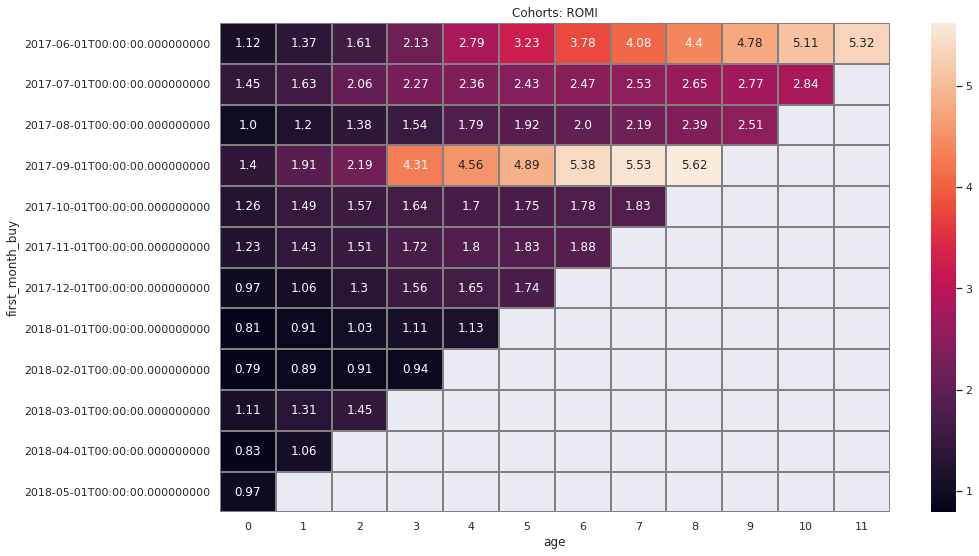

In [64]:
sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(report_total_romi, annot=True, fmt='.3', linewidths=1, linecolor='gray');

Разные когорты имеют разные ROMI. Июньская когорта 2017 года сильно отличается от остальных, сохраняется неплохая динамика на протяжении всего срока. Июльская когорта, стартует лучше первой, но быстро теряет динамику и на 11 месяце сильно уступает июньской. Августовская когорта еще слабее чем июльская, но на 9 месяце догоняет июльскую. Сентябрьская когорта - аномалия, стартуя обычно (почти так же как июльская), на 4 месяце делает скачок большой, что делает ее на мой взгляд самой удачной когортой. Быть может это была программа лояльности для данной группы клиентов (доп промо акция, рассылка, личное предложение, мне выяснить не удалось, 4 месяц приходится на декабрь, возможно это программа лояльности). Далее когорты ведут себя более-менее одинаково. Дальнейшие предположения и выводы в шаге 3.

# Шаг 3. Напишем выводы: дадим рекомендации, куда и сколько стоит вкладывать денег

Вернемся к тем таблицам, что мы уже имеем. Первая из них - расходы по месяцам на маркетинг:

In [65]:
month_grouped

,month,costs,%
0,2017-06-01,18015.00,5.473494
1,2017-07-01,18240.59,5.542035
2,2017-08-01,14790.54,4.493807
3,2017-09-01,24368.91,7.404001
4,2017-10-01,36322.88,11.035974
5,2017-11-01,37907.88,11.517544
6,2017-12-01,38315.35,11.641346
7,2018-01-01,33518.52,10.183926
8,2018-02-01,32723.03,9.942232
9,2018-03-01,30415.27,9.241066


Видим что в месяцы осенние и зимние расходы на маркетинг растут. Расходы увелиичиваются с 09 месяца по 03 месяц.

Сделаю heatmap по месячным расходам с разбивкой по месяцам

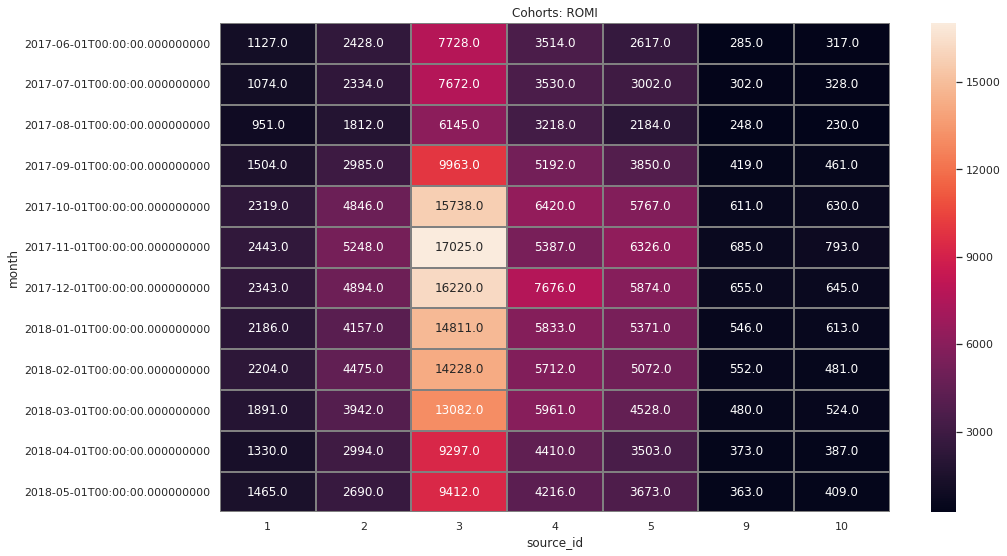

In [66]:
costs['costs_rounded'] = costs['costs'].round()
sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(costs.pivot_table(index = 'month', columns = 'source_id', values = 'costs_rounded', aggfunc = 'sum'), annot=True, fmt='.6', linewidths=1, linecolor='gray');

Как мы видим все расходы на маркетинг увеличиваются более менее пропорционально по всем группам источников. Обратимся к таблице с romi по источникам привлечения.

In [67]:
final_report_romi

,source_id,ltv,cac,romi,ltv_d,ltv_t,romi_d,romi_t
0,1,6.940911,1.203331,5.768082,6.993071,6.774523,5.811428,5.629809
1,2,7.390668,2.384605,3.099326,7.645254,6.591513,3.206089,2.764195
2,3,5.665644,5.832747,0.971351,5.712040,5.496071,0.979305,0.942278
3,4,5.454412,2.454233,2.222450,5.585805,5.058092,2.275988,2.060966
4,5,6.490089,2.671748,2.429155,6.720179,5.599688,2.515274,2.095889
5,9,4.124721,0.999183,4.128093,4.090371,4.218795,4.093714,4.222243
6,10,3.419059,2.147728,1.591943,3.419650,3.417405,1.592217,1.591172


Тут мы видим, что все источники трафика имеют сильно разные ROMI. Конечно нас интересуют те у которых он выше. Начнем с 1 источника его бы конечно наращивал активнее всего. Выделил бы 1 источник в самый приоритетный и зафиксировал на первый месяц в размере самого высоко бюджета (исторически) на уровне 2500, в обычный месяц. Не снижал бы его, а высокие месяца увеличивал также планомерно, отслеживал бы изменения, в случае если показатели были бы такими же, наращивал бы его. Также бы поступил с источником номер 9, зафиксировав минимальное значение на 685, с увеличением в высокие месяца. Далее идет источник 2, ROMI также позволяет зафиксировать его на уровне 5248 (исторически самом высоком), увеличивая бюджет в высокие месяца. Далее 4 и 5 источники (помня, что у нас LTV без маржинального коэффициента будем с ними аккуратны). Зафиксировать их можно на уровне 5192 и 3850 (вторые самые большие бюджеты) на обычные месяца, с увеличением в высокие сезоны. 10 источник не большую долю бюджета имеет. Можно оставить в текущем состоянии. Наконец самый большой источник в объеме бюджета 3. в обычный месяц его оставить на уровне первого месяца (у нас в целом неплохие показатели когорты ИЮЛЯ 2017 года), а вот с его приростом быть максимально осторожным, я бы не повышал его выше 9963 на все высокие месяцы. 

Все действия весьма осторожные, требуют особого контроля. Ежемесячно пересобирать отчеты ROMI и мониторить ситуацию. 